In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import processing
import runner
import matplotlib.pyplot as plt
import scipy
import plots

from scipy.signal import hilbert


/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


# Synchronization

In [2]:
model = runner.run(modified_params={})

initializing net ...
initialization time: 0.2247447967529297s
------------------ running network!
runtime: 6.2


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


Generate PSD plot ...


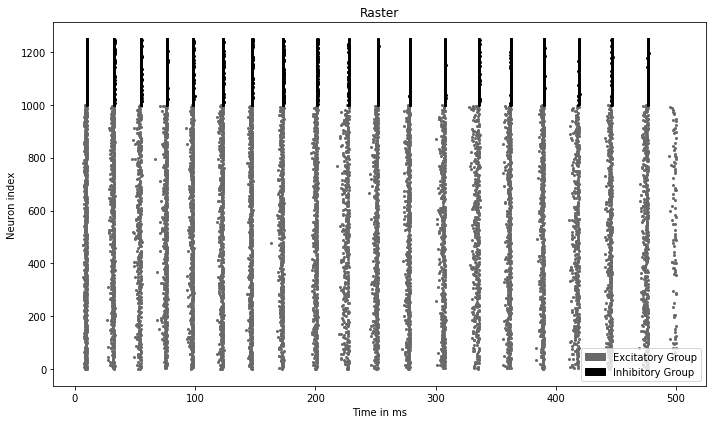

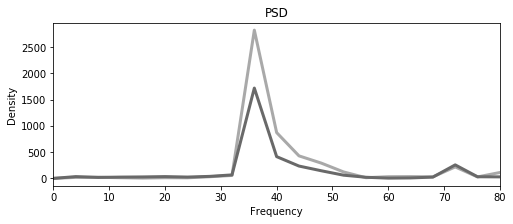

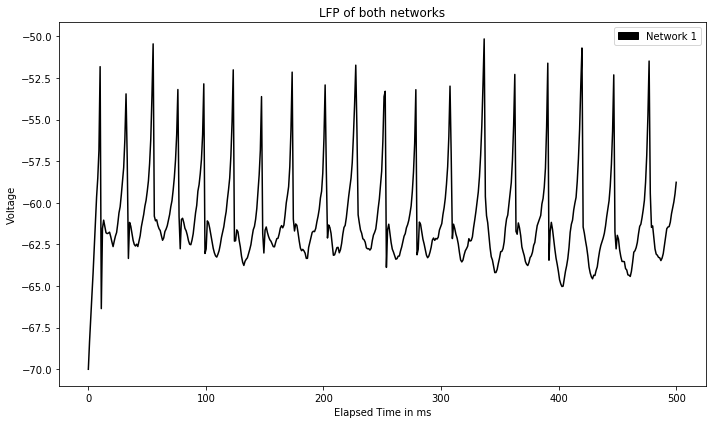

In [17]:
plots.raster(model)
plots.psd(model)
plots.lfp_nets(model, single_net=True)

In [5]:
neuron_1 = model['model_results']['net']['v_all_neurons_e'][0][:100] # only 2 neurons
neuron_2 = model['model_results']['net']['v_all_neurons_e'][1][:100] # only 2 neurons

# TODO: provide local field potentials

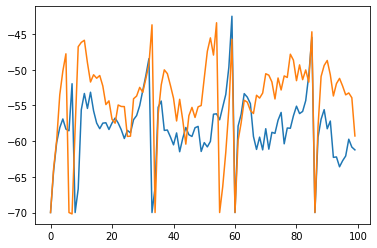

In [15]:
plt.plot(neuron_1)
plt.plot(neuron_2)
plt.show()

## Phase Synchronization

* http://www.scholarpedia.org/article/Synchronization_measures#Phase_synchronization
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html


In [4]:
phase = processing.hilphase(neuron_1, neuron_2)
print("Phase difference of:", phase)

phase_diff, avg_phase = processing.hilphase_2(neuron_1, neuron_2)
plt.plot(phase_diff)
plt.show()

print("Phase difference of:", avg_phase)


analytic_signal = hilbert(neuron_1)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(analytic_signal, c='black')
axs[0].set_title("Analytic Signal")

axs[1].plot(amplitude_envelope, c='orange')
axs[1].set_title("Amplitude Envelope")

axs[2].plot(instantaneous_phase, c='green')
axs[2].set_title("Instantaneous Phase")



NameError: name 'neuron_1' is not defined

## Cross Correlate

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

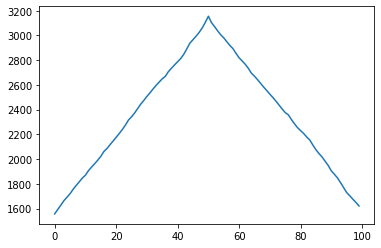

In [57]:
correlate = scipy.signal.correlate(neuron_1, neuron_2, mode='same') / neuron_1.shape[0]
plt.plot(correlate)

## Coherence

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.coherence.html

Text(0, 0.5, 'Coherence')

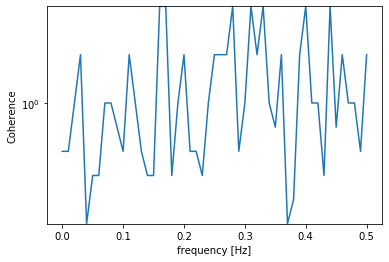

In [54]:
f, Cxy = scipy.signal.coherence(neuron_1, neuron_2)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')


## Local Order Parameter

We want to calculate the local order parameter as used in Meng et al. 2018 to measure synchronization within a network.
It is defined as the average phase of the neurons in a network. Each neuron corresponds to an oscillator. We get the phase of the oscillator by computing the analyticsl signal using the Hilbert transform.

Order parameter:

* $ r(t)e^{i\psi(t)} = \frac{1}{N} \sum^{N}_{\alpha = 1} e^{i\psi_k^{\alpha}(t)} $

[2.96497642 3.20526274 3.19350933 3.27308101 3.194249   3.22942158
 3.09677749 3.15885024 2.81278766 2.89907788]
[169.8806352835466, 163.24239338320535, 179.44216852980273, 176.32556105540377, -179.9865768083986, 176.5114563243407, 172.1312328725119, 179.2132228366979, 170.66963357092553, 164.76482665849372]
Local order of 3.0157635782995857


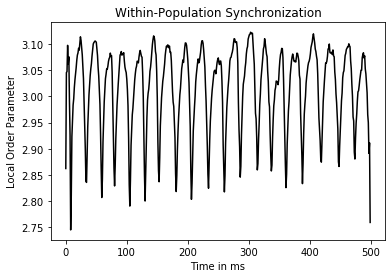

In [34]:
# all neurons of excitatory group
neurons = model['model_results']['net']['v_all_neurons_e'][:100]

# compute the phase of each neuron
phases = [processing.phase(neuron) for neuron in neurons]

print(phases[0][:10])
print([np.degrees(phase)[0] for phase in phases[:10]])

# average of each time step
avg_phase = np.average(phases, axis=0)

plt.title("Within-Population Synchronization")
plt.xlabel("Time in ms")
plt.ylabel("Local Order Parameter")

plt.plot(avg_phase, c="black")

print(f"Local order of {np.average(avg_phase)}")

PLV of excitatorry group 0.21689090088924692


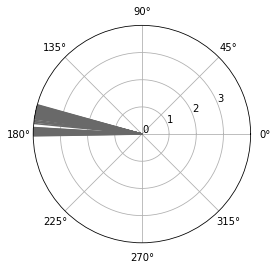

In [21]:
# all neurons of excitatory group
neurons = model['model_results']['net']['v_all_neurons_e'][:100]

plv, complex_planes, _ = processing.phase_locking_value(neurons)
print(f"PLV of excitatorry group {plv}")

# compute the phase of each neuron
phases = [processing.phase(neuron) for neuron in neurons]

plt.axes(polar=True)
plt.ylim(0, 4)
plt.yticks(np.arange(0, 4 , 1.0))
for angle in phases:
    # TODO: we cannot simple take the average here!
    # np.average(angle)
    plt.plot((0, angle[0]), (0, 4), c="dimgrey")
plt.show()

# TODO: plot avg phase parameter over time!
# TODO: plot avg phase difference over time?
# TODO: try some model configuration that are highly desynchronized and highly synchronized to analyze behavior of order parameter

# take the average
# print(f"Local Order of {avg_phase}")
